<a href="https://colab.research.google.com/github/I-CHIEN/DNN_IC/blob/master/MiniBooNE_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# https://keras.io/
!pip install -q keras
import keras
import tensorflow as tf
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from __future__ import print_function
%matplotlib inline


In [0]:

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:

import math
fp = open('MiniBooNE_PID (5).txt', "r")
line = fp.readline()
line_replace=line.replace(" ", ",")
line_split=line_replace.split(',')
line_split[len(line_split)-1]=line_split[len(line_split)-1].replace('\n','')
line_split.pop(0)
data = line_split
size_signal = int(data[0])
size_background = int(data[1])
print('size signal : ' + str(size_signal) + '\n')
print('size background : ' + str(size_background) + '\n')
## 用 while 逐行讀取檔案內容，直至檔案結尾
signal_data = []
background_data = []
index = 0
while line:
    if index%10000 == 0:
        print(index)
    line = fp.readline()
    line_replace = line.replace(" ", ",")
    line_split = line_replace.split(',')
    line_split[len(line_split) - 1] = line_split[len(line_split) - 1].replace('\n', '')
    line_split.pop(0)

    data_split = line_split
    data = []
    for i in range(0, len(data_split)):
        if len(data_split[i]) >= 1:
            value = float(data_split[i])
            if value > 0:
                value = math.log2(value+10)
            elif value < 0:
                value = math.log2(value*(-1.0)+10)*(-1.0)
            data.append(value)
    if index < size_signal:
        signal_data.append(data)
    elif index >= size_signal and index < (size_signal+size_background):
        background_data.append(data)
    else:
        break
    index=index+1
fp.close()

size signal : 36499

size background : 93565

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


In [0]:
from sklearn.utils import shuffle
signal_data = shuffle(signal_data,random_state = 0)
background_data = shuffle(background_data,random_state = 0)

In [0]:
train_data_images = []
train_data_labels = []

for i in range(0,size_signal-6235):
    train_data_images.append(signal_data[i])
    train_data_labels.append(1)
for i in range(0,size_signal-6235):
    train_data_images.append(background_data[i])
    train_data_labels.append(0)
train_data_images, train_data_labels = shuffle(train_data_images, train_data_labels, random_state=0)
    
    
test_data_images = []
test_data_labels = []
for i in range(size_signal-6235,size_signal):
    test_data_images.append(signal_data[i])
    test_data_labels.append(1)
for i in range(size_background-15765,size_background):
    test_data_images.append(background_data[i])
    test_data_labels.append(0)
test_data_images, test_data_labels = shuffle(test_data_images, test_data_labels, random_state=0)
    
valid_data_images = test_data_images
valid_data_labels = test_data_labels

In [0]:

for i in range(0,10):
    print(train_data_images[i])
    print(train_data_labels[i])

[3.96236393150695, 3.4692634518849563, 7.196233260869594, 3.3648140284681523, 3.3221734302863175, 3.337119051870616, 3.4065993887979027, 3.436597620940154, 3.7065128709892035, 3.349604197098386, 3.8074012936529504, 6.861285456810741, 3.4480578115628826, 3.363704032751817, 3.620388172880033, 9.764156699202214, 3.3639616087941597, 5.550201920858906, 3.3498716607368597, 3.341643386662104, -3.3533471476644663, 3.359465648651799, 6.735124081515013, 3.693298488793731, 3.3813656120843367, -3.462878162754591, 7.419513610421236, 3.5469598811526777, 3.3483555190531384, -3.3468703959778336, 4.296718023392397, 3.4646329832693534, 3.592687850010096, 8.839824202543696, 3.3314749228977263, 3.3576737488675197, -3.341944343847835, -3.561453229783436, 3.5206560781839924, 3.339691974595377, 7.580296259888939, -3.766585621466008, 3.3541399754435823, 3.8550867340542894, 0.0, 3.356081254513789, -3.3397870216375107, 3.8084766964665455, 3.384942232822483, 3.3533145389746526]
0
[3.925637750325134, 3.5049000066

In [0]:

for i in range(0,10):
    print(test_data_images[i])
    print(test_data_labels[i])

[3.8593742640410222, 3.483592666165547, 6.183450784090224, 3.3605873361948952, 3.3239344257094494, 3.351845254102978, 3.4318942250560074, 3.4398011697663002, 3.77647145993313, 3.351381687444541, 3.8573759313088694, 7.716133525246238, 3.32454329132461, 3.374318529489606, 3.6310111271362397, 9.974841885489694, 3.394588771644352, 5.204199418997428, 3.3682157455374435, 3.3731544230960573, 3.3622050313588403, 3.364321829810559, 6.304779331855883, 3.9137913073133834, 3.3752841472917945, 3.349531732803623, 6.597629495814591, 3.521476696328046, 3.3551407603842134, -3.409094627068198, 3.963323372963292, 3.4645950849641287, 3.3838794094735665, 8.703339532044101, 3.3293431276273058, 3.3555396960993678, 3.355643147631641, -3.7686522644459144, 3.5453642376023335, 3.331054194641357, 6.967917894840238, -4.879382299748683, 3.3735065098702566, 4.143666061638932, 0.0, 3.334818794897513, 3.3581459911785694, 3.4874940670260437, 3.6482065630360303, 3.3563632973246493]
0
[4.080393315568728, 3.64643572933573

In [0]:

df_train=pd.DataFrame(train_data_images)
df_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
60523,3.806716,3.515860,7.153299,3.372195,0.000000,3.340324,3.448531,3.438235,3.762622,3.342337,3.842789,7.744047,3.393316,3.332916,3.583728,9.668628,3.378614,4.791027,3.369141,3.437624,3.467247,3.366357,5.470469,3.888014,3.379694,3.442858,6.490724,3.529680,3.353817,-3.337702,4.048091,3.433965,3.489557,8.384486,3.335904,3.360217,-3.418346,-3.635765,3.548270,3.329736,7.258462,-4.731156,-3.435617,3.936852,3.322215,3.336626,3.364989,3.610042,3.546976,3.349853
60524,3.908890,3.528830,6.538911,3.364246,3.325272,3.342699,3.425647,3.432105,3.753181,3.339932,3.822690,8.130133,3.458544,3.372912,3.538697,8.997112,3.356855,5.659616,3.360370,3.536898,-3.458084,3.358591,5.605631,3.728070,3.373910,-3.372097,7.302858,3.586831,3.344901,-3.349677,4.169652,3.471202,3.552801,7.631555,3.329243,3.369068,-3.366051,-3.625683,3.455847,3.334326,7.581969,-5.643088,3.379981,3.830714,0.000000,3.345985,-3.400310,3.579105,-3.335076,3.360486
60525,4.024356,3.559296,6.651010,3.357312,3.322932,3.336422,3.456917,3.436010,3.766203,3.353389,3.856307,7.176024,3.325063,0.000000,3.660170,9.283037,3.371239,5.787169,3.372254,3.445833,3.416158,3.360570,4.522376,4.735690,3.386137,3.384923,7.267292,3.563585,3.344125,3.449581,4.083861,3.337524,3.415498,8.601180,3.336112,3.378449,3.360283,-3.753467,3.509883,3.326304,7.398633,5.014110,3.356438,3.551766,0.000000,3.323529,3.337843,3.750873,4.064872,3.352735
60526,3.770128,3.541702,6.787916,3.359172,3.322635,3.336932,3.470217,3.439531,3.748573,3.356465,3.834103,7.891699,3.439675,3.347853,3.662004,9.848268,3.372780,5.033132,3.362717,3.454610,3.377776,3.364435,6.378552,3.765757,3.387480,-3.372687,7.369615,3.498998,3.354433,-3.476843,3.961641,3.422401,3.498765,8.896354,3.332964,3.364093,3.405023,-3.614014,3.486085,3.333865,6.814243,-5.730827,3.650784,3.928596,0.000000,3.347911,3.336485,3.477195,-3.322526,3.347129
60527,3.759691,3.683562,5.150288,3.354436,0.000000,3.345370,3.576701,3.445840,3.740951,3.344654,3.834038,6.464260,3.458708,3.342600,3.645758,9.182998,3.358898,6.368016,3.363683,3.331475,-3.381742,3.364795,5.129473,3.828657,3.377395,-3.344779,7.154484,3.471875,3.364510,-3.459952,3.844047,3.411411,3.615942,8.989956,3.325951,3.347176,3.517093,-3.505352,3.556326,3.332256,6.767730,-5.975334,3.489587,3.847260,0.000000,3.340863,3.345724,3.471342,3.358244,3.343868


In [0]:

df_test=pd.DataFrame(test_data_images)
df_test.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
21995,3.976578,3.510113,6.862823,3.358004,3.323756,3.341342,3.422353,3.428701,3.778274,3.339843,3.880182,8.873373,3.446708,3.401601,3.526846,9.402916,3.368942,4.240662,3.358572,3.493535,-3.614984,3.371256,5.915758,3.821351,3.383857,-3.693000,3.788290,3.520999,3.346280,-3.397064,4.166884,3.483073,3.460887,7.826593,3.335240,3.376868,3.352120,-3.684486,3.474237,3.332555,7.102060,-5.241547,3.469387,4.587905,3.327927,3.344480,-3.357033,3.500585,3.542022,3.349994
21996,4.068269,3.550050,6.503250,3.355323,3.322304,3.332927,3.429489,3.433636,3.749333,3.356484,3.823423,7.138436,3.366496,3.408895,3.691405,9.412218,3.353746,4.807736,3.355718,3.389565,-3.470329,3.350203,5.327680,3.903059,3.370056,-3.525455,7.158236,3.554456,3.342232,3.417750,4.093822,3.459204,3.644405,8.858382,3.324542,3.380463,-3.379913,-3.495354,3.480565,3.330097,7.478276,3.844139,3.498791,3.884706,3.322679,3.339876,-3.397691,3.806745,3.691042,3.347587
21997,3.915845,3.553906,7.704824,3.367326,3.322272,0.000000,3.391870,3.429637,3.726834,3.339090,3.830630,-3.382607,3.425300,3.386247,3.560492,8.866472,3.346387,3.935781,3.352926,3.379941,-3.421078,3.356628,5.829281,3.650690,3.388304,-3.346346,7.080146,3.565572,3.344543,3.372915,4.177716,3.460425,3.434049,8.671262,3.325177,3.352267,-3.387868,-3.656562,3.584863,3.336472,7.625439,-4.551811,-3.409405,3.777089,0.000000,3.363261,-3.406002,3.968475,3.615563,3.356377
21998,3.722149,3.506277,7.472415,3.356946,3.322317,3.340847,3.569062,3.446413,3.770040,3.357987,3.844993,4.874404,3.456498,3.326236,3.563358,9.180344,3.390902,4.624721,3.374993,3.474969,3.515837,3.367100,5.815186,4.022659,3.391349,3.529551,4.081471,3.503927,3.343222,-3.480769,3.792443,3.478616,3.411683,8.716048,3.336768,3.368809,3.518091,-3.782727,3.433099,3.328296,6.625243,-4.918277,3.635425,3.900226,0.000000,3.330179,3.340735,3.382273,-3.373276,3.368734
21999,3.704662,3.405890,5.306463,3.355780,3.324788,3.387395,3.513273,3.443418,3.748142,3.357229,3.844126,8.337247,3.429024,3.368653,3.639731,10.568108,3.459699,4.148759,3.368680,3.479123,3.456308,3.367016,6.937945,4.006437,3.390910,3.331203,5.715657,3.488374,3.341124,-3.337666,3.916988,3.482195,3.390776,8.113794,3.338967,3.376245,3.465055,-3.852800,3.494288,3.330458,7.279332,-3.895230,3.341897,3.986455,0.000000,3.336068,-3.327351,3.454769,3.344049,3.350640


In [0]:

df1_train = df_train.iloc[:, :]
df1_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [0]:

df1_test = df_test.iloc[:, :]
df1_test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [0]:

df2_train = pd.get_dummies(df1_train)
df2_train.shape

(60528, 50)

In [0]:

df2_test = pd.get_dummies(df1_test)
df2_test.shape

(22000, 50)

In [0]:

cols_train = df2_train.columns.tolist()
cols_train

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [0]:

cols_test = df2_test.columns.tolist()
cols_test

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [0]:

x_train = df2_train
x_train.shape

(60528, 50)

In [0]:

x_test = df2_test
x_test.shape

(22000, 50)

In [0]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [0]:

y_train = pd.DataFrame(train_data_labels)
y_train.tail()

,0
60523,0
60524,0
60525,0
60526,0
60527,1


In [0]:

y_test = pd.DataFrame(test_data_labels)
y_test.tail()

,0
21995,0
21996,0
21997,0
21998,0
21999,1


In [0]:

y2_train = y_train
y2_train.describe()

,0
count,60528.000000
mean,0.500000
std,0.500004
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [0]:

y2_test = y_test
y2_test.describe()

,0
count,22000.000000
mean,0.283409
std,0.450664
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [0]:

from keras import backend as K
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
def swish(x):
    return (K.sigmoid(x) * x)
get_custom_objects().update({'swish': swish })

In [0]:

from keras.layers.normalization import BatchNormalization

In [0]:

from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping(monitor= 'val_loss', patience= 4)

In [0]:

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:

from keras.layers import Dropout

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 25s 520us/step - loss: 0.1090 - mean_absolute_error: 0.2381 - acc: 0.8588 - val_loss: 0.0938 - val_mean_absolute_error: 0.2215 - val_acc: 0.8832
Epoch 2/100
48422/48422 [==============================] - 20s 412us/step - loss: 0.0871 - mean_absolute_error: 0.1994 - acc: 0.8870 - val_loss: 0.0794 - val_mean_absolute_error: 0.1939 - val_acc: 0.9061
Epoch 3/100
48422/48422 [==============================] - 20s 410us/step - loss: 0.0828 - mean_absolute_error: 0.1884 - acc: 0.8942 - val_loss: 0.0804 - val_mean_absolute_error: 0.2071 - val_acc: 0.9062
Epoch 4/100
48422/48422 [==============================] - 20s 417us/step - loss: 0.0790 - mean_absolute_error: 0.1777 - acc: 0.8985 - val_loss: 0.0770 - val_mean_absolute_error: 0.2057 - val_acc: 0.9063
Epoch 5/100
48422/48422 [==============================] - 20s 411us/step - loss: 0.0757 - mean_absolute_error: 0.1686 - acc: 0.9020 -

0.1332502778118307

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.806347874720358

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.9249398556535685

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8615821319190259

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14380,  1385],
       [  468,  5767]])

In [0]:

min_epochs

23

In [0]:

min_val_loss

0.06045936992800907

In [0]:
min_val_acc

0.9197092350703437

In [0]:
min_val_mae

0.13467295196688353

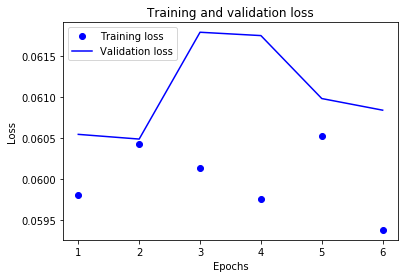

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

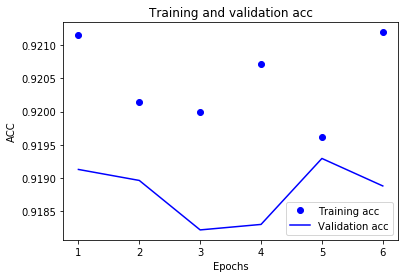

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

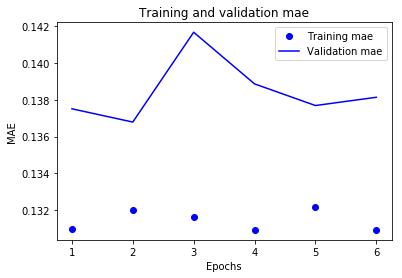

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='glorot_normal'))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 27s 552us/step - loss: 0.3188 - mean_absolute_error: 0.4336 - acc: 0.6642 - val_loss: 0.1200 - val_mean_absolute_error: 0.2499 - val_acc: 0.8357
Epoch 2/100
48422/48422 [==============================] - 22s 444us/step - loss: 0.1342 - mean_absolute_error: 0.2824 - acc: 0.8278 - val_loss: 0.1120 - val_mean_absolute_error: 0.2365 - val_acc: 0.8406
Epoch 3/100
48422/48422 [==============================] - 22s 444us/step - loss: 0.1235 - mean_absolute_error: 0.2600 - acc: 0.8435 - val_loss: 0.1047 - val_mean_absolute_error: 0.2430 - val_acc: 0.8615
Epoch 4/100
48422/48422 [==============================] - 21s 442us/step - loss: 0.1167 - mean_absolute_error: 0.2471 - acc: 0.8530 - val_loss: 0.0920 - val_mean_absolute_error: 0.2257 - val_acc: 0.8827
Epoch 5/100
48422/48422 [==============================] - 22s 445us/step - loss: 0.1104 - mean_absolute_error: 0.2346 - acc: 0.8635 -

0.14777365439046514

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.7732980832782551

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.9382518043303929

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8478260869565217

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14050,  1715],
       [  385,  5850]])

In [0]:

min_epochs

34

In [0]:

min_val_loss

0.06254945928161644

In [0]:
min_val_acc

0.9188831983943153

In [0]:
min_val_mae

0.1403157912698163

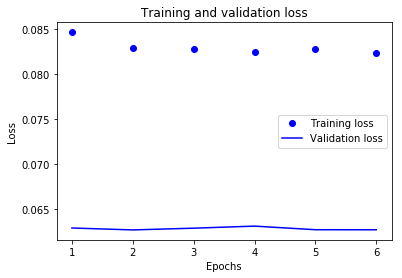

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

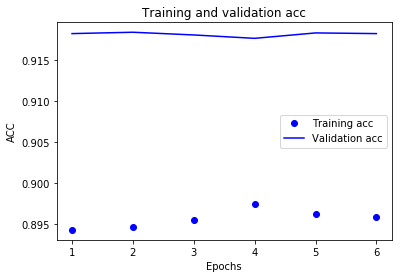

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

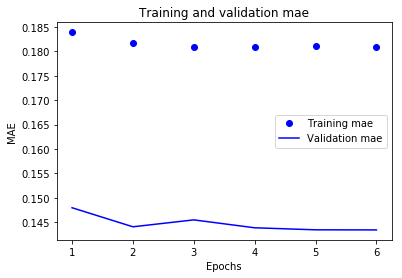

In [0]:
plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 26s 534us/step - loss: 0.1335 - mean_absolute_error: 0.2667 - acc: 0.8372 - val_loss: 0.1008 - val_mean_absolute_error: 0.2067 - val_acc: 0.8882
Epoch 2/100
48422/48422 [==============================] - 20s 418us/step - loss: 0.0905 - mean_absolute_error: 0.2026 - acc: 0.8843 - val_loss: 0.0779 - val_mean_absolute_error: 0.1858 - val_acc: 0.9014
Epoch 3/100
48422/48422 [==============================] - 20s 413us/step - loss: 0.0808 - mean_absolute_error: 0.1816 - acc: 0.8963 - val_loss: 0.0813 - val_mean_absolute_error: 0.1779 - val_acc: 0.8970
Epoch 4/100
48422/48422 [==============================] - 20s 422us/step - loss: 0.0767 - mean_absolute_error: 0.1708 - acc: 0.9014 - val_loss: 0.0688 - val_mean_absolute_error: 0.1463 - val_acc: 0.9117
Epoch 5/100
48422/48422 [==============================] - 21s 426us/step - loss: 0.0733 - mean_absolute_error: 0.1623 - acc: 0.9056 -

0.1260820755795999

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.7845068547850392

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.945308740978348

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8574338085539714

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14146,  1619],
       [  341,  5894]])

In [0]:

min_epochs

21

In [0]:

min_val_loss

0.058565455112361955

In [0]:
min_val_acc

0.9223525524336347

In [0]:
min_val_mae

0.12232479806844802

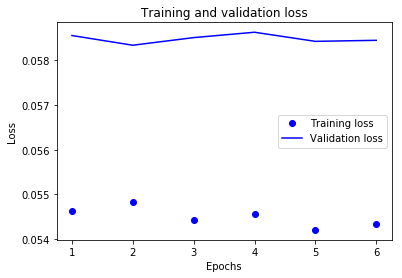

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

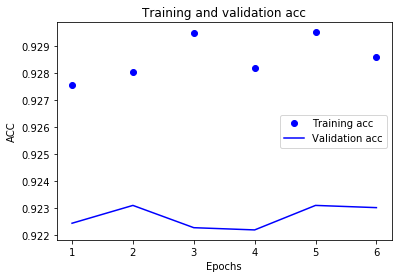

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

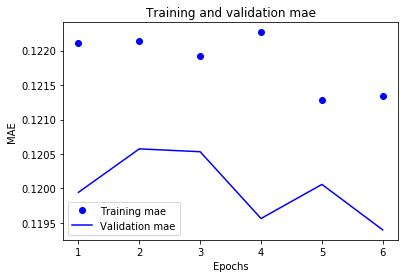

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 28s 570us/step - loss: 0.3902 - mean_absolute_error: 0.5023 - acc: 0.5863 - val_loss: 0.1644 - val_mean_absolute_error: 0.3620 - val_acc: 0.7816
Epoch 2/100
48422/48422 [==============================] - 21s 438us/step - loss: 0.1607 - mean_absolute_error: 0.3363 - acc: 0.7825 - val_loss: 0.1067 - val_mean_absolute_error: 0.2507 - val_acc: 0.8682
Epoch 3/100
48422/48422 [==============================] - 22s 445us/step - loss: 0.1261 - mean_absolute_error: 0.2717 - acc: 0.8414 - val_loss: 0.0903 - val_mean_absolute_error: 0.2019 - val_acc: 0.8806
Epoch 4/100
48422/48422 [==============================] - 21s 440us/step - loss: 0.1110 - mean_absolute_error: 0.2409 - acc: 0.8630 - val_loss: 0.0846 - val_mean_absolute_error: 0.1820 - val_acc: 0.8880
Epoch 5/100
48422/48422 [==============================] - 21s 438us/step - loss: 0.1043 - mean_absolute_error: 0.2269 - acc: 0.8735 -

0.1529091247103431

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.7728831442891058

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.9398556535685646

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8482304407613809

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14043,  1722],
       [  375,  5860]])

In [0]:

min_epochs

21

In [0]:

min_val_loss

0.0633140217833493

In [0]:
min_val_acc

0.9173963323774642

In [0]:
min_val_mae

0.14689972597903186

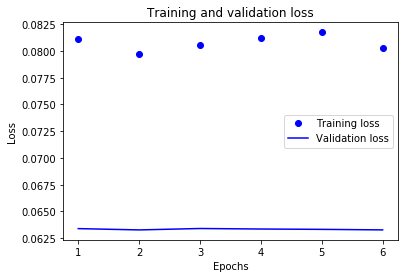

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

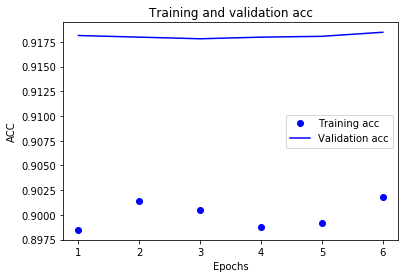

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

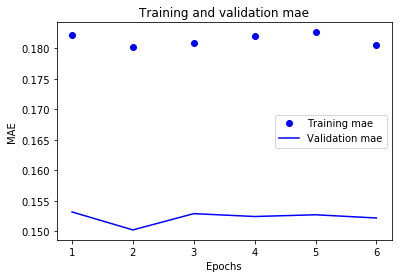

In [0]:
plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('selu'))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('selu'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 28s 574us/step - loss: 0.1313 - mean_absolute_error: 0.2740 - acc: 0.8395 - val_loss: 0.0973 - val_mean_absolute_error: 0.2319 - val_acc: 0.8814
Epoch 2/100
48422/48422 [==============================] - 21s 442us/step - loss: 0.0947 - mean_absolute_error: 0.2209 - acc: 0.8826 - val_loss: 0.0900 - val_mean_absolute_error: 0.2174 - val_acc: 0.8852
Epoch 3/100
48422/48422 [==============================] - 21s 439us/step - loss: 0.0865 - mean_absolute_error: 0.2030 - acc: 0.8941 - val_loss: 0.0772 - val_mean_absolute_error: 0.1958 - val_acc: 0.9020
Epoch 4/100
48422/48422 [==============================] - 21s 443us/step - loss: 0.0825 - mean_absolute_error: 0.1930 - acc: 0.8969 - val_loss: 0.0814 - val_mean_absolute_error: 0.1847 - val_acc: 0.8958
Epoch 5/100
48422/48422 [==============================] - 21s 443us/step - loss: 0.0796 - mean_absolute_error: 0.1858 - acc: 0.9009 -

0.13305218451673334

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.7910527725689793

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.9472333600641539

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8621268520545944

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14205,  1560],
       [  329,  5906]])

In [0]:

min_epochs

27

In [0]:

min_val_loss

0.057531660515307274

In [0]:
min_val_acc

0.9245828514589114

In [0]:
min_val_mae

0.1289208064736777

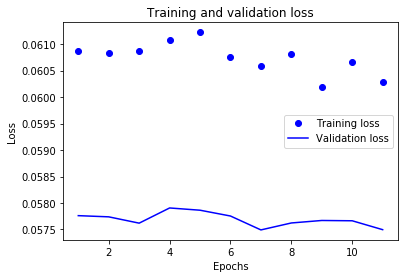

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

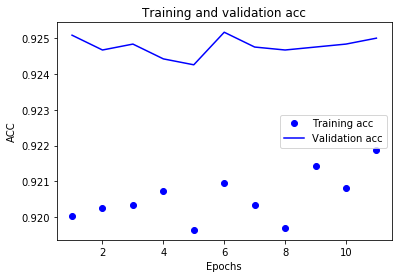

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

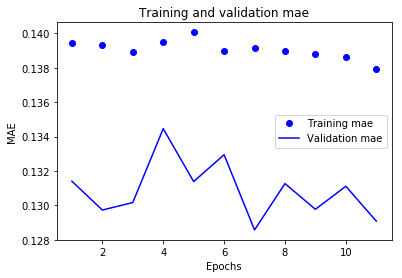

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.5))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 29s 606us/step - loss: 0.4200 - mean_absolute_error: 0.4708 - acc: 0.6558 - val_loss: 0.1143 - val_mean_absolute_error: 0.2559 - val_acc: 0.8487
Epoch 2/100
48422/48422 [==============================] - 22s 459us/step - loss: 0.1317 - mean_absolute_error: 0.2867 - acc: 0.8311 - val_loss: 0.1050 - val_mean_absolute_error: 0.2360 - val_acc: 0.8592
Epoch 3/100
48422/48422 [==============================] - 22s 459us/step - loss: 0.1175 - mean_absolute_error: 0.2609 - acc: 0.8504 - val_loss: 0.0978 - val_mean_absolute_error: 0.2127 - val_acc: 0.8671
Epoch 4/100
48422/48422 [==============================] - 22s 459us/step - loss: 0.1122 - mean_absolute_error: 0.2492 - acc: 0.8592 - val_loss: 0.1036 - val_mean_absolute_error: 0.2413 - val_acc: 0.8583
Epoch 5/100
48422/48422 [==============================] - 22s 461us/step - loss: 0.1075 - mean_absolute_error: 0.2403 - acc: 0.8630 -

0.16189285743236542

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.7875690607734807

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.9145148356054531

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8463079777365492

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14227,  1538],
       [  533,  5702]])

In [0]:

min_epochs

24

In [0]:

min_val_loss

0.06799533316985883

In [0]:
min_val_acc

0.9111184536396483

In [0]:
min_val_mae

0.15996088288932442

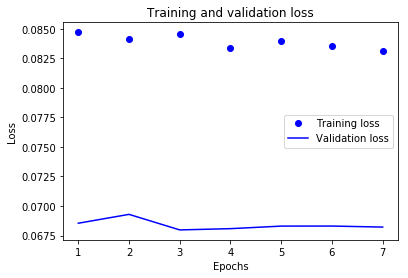

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

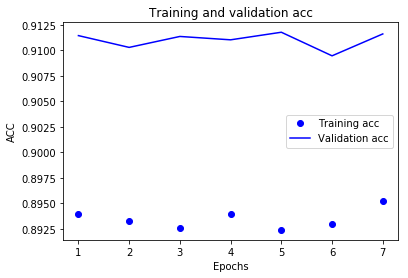

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

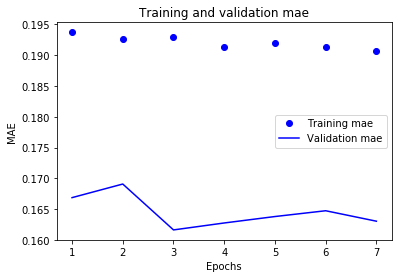

In [0]:
plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('swish'))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('swish'))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 28s 579us/step - loss: 0.1219 - mean_absolute_error: 0.2544 - acc: 0.8544 - val_loss: 0.0896 - val_mean_absolute_error: 0.2222 - val_acc: 0.8945
Epoch 2/100
48422/48422 [==============================] - 21s 424us/step - loss: 0.0854 - mean_absolute_error: 0.1968 - acc: 0.8928 - val_loss: 0.0805 - val_mean_absolute_error: 0.1880 - val_acc: 0.8964
Epoch 3/100
48422/48422 [==============================] - 21s 429us/step - loss: 0.0805 - mean_absolute_error: 0.1849 - acc: 0.8989 - val_loss: 0.0729 - val_mean_absolute_error: 0.1733 - val_acc: 0.9070
Epoch 4/100
48422/48422 [==============================] - 21s 429us/step - loss: 0.0758 - mean_absolute_error: 0.1750 - acc: 0.9031 - val_loss: 0.0738 - val_mean_absolute_error: 0.1724 - val_acc: 0.9064
Epoch 5/100
48422/48422 [==============================] - 21s 426us/step - loss: 0.0738 - mean_absolute_error: 0.1705 - acc: 0.9064 -

0.1323814293958924

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.7945521073316167

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.940336808340016

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.8613192302042015

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14249,  1516],
       [  372,  5863]])

In [0]:

min_epochs

35

In [0]:

min_val_loss

0.05850302348983952

In [0]:
min_val_acc

0.9241698331208972

In [0]:
min_val_mae

0.13048656146703191

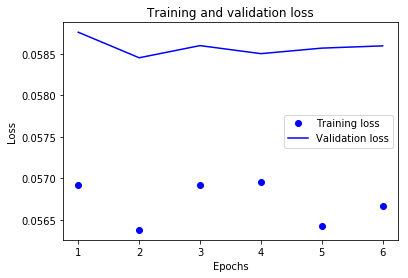

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

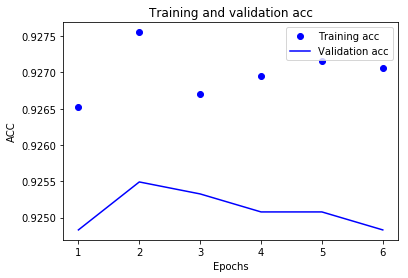

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

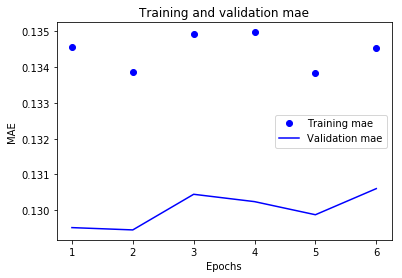

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [0]:

model = Sequential()

model.add(Dense(units=100, input_dim=50, kernel_initializer='lecun_normal'))
model.add(BatchNormalization())
model.add(Activation('swish'))
model.add(Dropout(0.5))

for i in range(3):
    model.add(Dense(units=100, kernel_initializer='lecun_normal'))
    model.add(BatchNormalization())
    model.add(Activation('swish'))
    model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[earlyStopping, learning_rate_reduction])

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

min_epochs = 1
min_val_loss = 1000
min_val_acc = 0
min_val_mae = 0
for i in range(0,len(acc)):
    if val_loss[i]<min_val_loss:
      min_val_loss = val_loss[i]
      min_val_acc = val_acc[i]
      min_val_mae = val_mae[i]
      min_epochs = i+1
      
history = model.fit(x_train, y2_train, batch_size=32, validation_split=0.2, epochs=min_epochs, callbacks=[earlyStopping, learning_rate_reduction])

scores = model.evaluate(x_test, y2_test, verbose=1)
scores[1]

Train on 48422 samples, validate on 12106 samples
Epoch 1/100
48422/48422 [==============================] - 29s 606us/step - loss: 0.3333 - mean_absolute_error: 0.4418 - acc: 0.6606 - val_loss: 0.1117 - val_mean_absolute_error: 0.2500 - val_acc: 0.8519
Epoch 2/100
48422/48422 [==============================] - 23s 469us/step - loss: 0.1295 - mean_absolute_error: 0.2788 - acc: 0.8335 - val_loss: 0.0909 - val_mean_absolute_error: 0.2074 - val_acc: 0.8806
Epoch 3/100
48422/48422 [==============================] - 22s 453us/step - loss: 0.1092 - mean_absolute_error: 0.2414 - acc: 0.8642 - val_loss: 0.0835 - val_mean_absolute_error: 0.1995 - val_acc: 0.8927
Epoch 4/100
48422/48422 [==============================] - 22s 451us/step - loss: 0.0989 - mean_absolute_error: 0.2221 - acc: 0.8760 - val_loss: 0.0845 - val_mean_absolute_error: 0.1832 - val_acc: 0.8910
Epoch 5/100
48422/48422 [==============================] - 22s 452us/step - loss: 0.0938 - mean_absolute_error: 0.2117 - acc: 0.8831 -

0.15519594299251382

In [0]:

from sklearn import metrics
y2_test_pred = model.predict(x_test,batch_size=32,verbose=0) #y2_test #ture
y2_test_pred_ = []
for i in range(0,len(y2_test_pred)):
    if y2_test_pred[i]>=0.5:
        y2_test_pred_.append(1)
    else:
        y2_test_pred_.append(0)
metrics.precision_score(test_data_labels, y2_test_pred_)

0.7737969328397674

In [0]:

metrics.recall_score(test_data_labels, y2_test_pred_)

0.9387329591018444

In [0]:

metrics.f1_score(test_data_labels, y2_test_pred_) 

0.84832234219871

In [0]:

from sklearn.metrics import confusion_matrix
confusion_matrix(test_data_labels, y2_test_pred_)

array([[14054,  1711],
       [  382,  5853]])

In [0]:

min_epochs

23

In [0]:

min_val_loss

0.06358186872551387

In [0]:
min_val_acc

0.9177267470478756

In [0]:
min_val_mae

0.15066602252277286

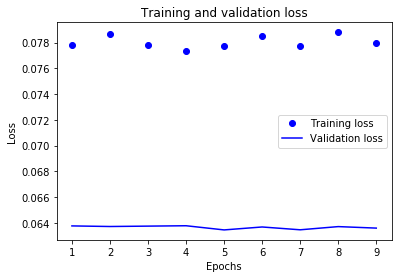

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

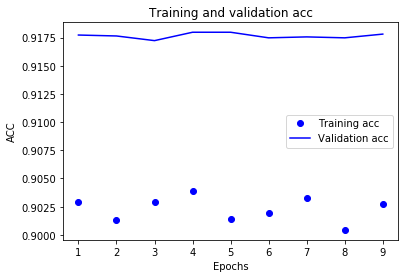

In [0]:

plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()

plt.show()

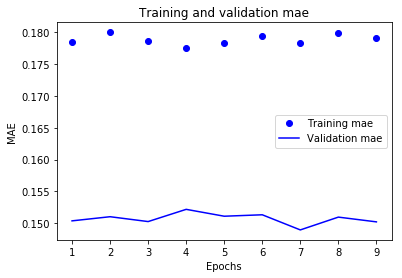

In [0]:
plt.clf()   # clear figure

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()